# Problem Statement:
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

Data Set Description:
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone. Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms.

# Malignant Comments Classifier - Multi Label Classification Project Using NLP
By: Ravinder Singh

#Internship Batch:28

In [1]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

# **Loading Train Dataset**

In [2]:
# Importing dataset excel file using pandas.
train_data=pd.read_csv('train.csv',engine='python') # Engine was set to python

In [3]:
print('No. of Rows :',train_data.shape[0])
print('No. of Columns :',train_data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
train_data.head()

No. of Rows : 159571
No. of Columns : 8


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


***Data set consist of 159571 rows and 8 columns. In this malignant, highly_malignant,rude,threat, abuse and loathe are our target variables having binary class of Yes (1) & No (2).***


In [4]:
# Sorting out columns for datatypes
train_data.columns.to_series().groupby(train_data.dtypes).groups

{int64: ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], object: ['id', 'comment_text']}

***Id & Comment_text comes with object datatypes and rest of features comes with interger datatypes.***

# **Loading Test Dataset**

In [5]:
# Importing dataset excel file using pandas.
test_data=pd.read_csv('test.csv') 
print('No. of Rows :',test_data.shape[0])
print('No. of Columns :',test_data.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
test_data.head()

No. of Rows : 153164
No. of Columns : 2


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# **Missing Value Check**

In [6]:
train_data.isnull().sum().any()

False

In [7]:
test_data.isnull().sum().any()

False

***Both Train & Test dataset contain no Missing values.***

**How the comments looks**

In [8]:
train_data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

**By looking at these remarks, we can infer that there is a lot of text processing necessary because many terms are not crucial for prediction.**

# Exploration of Target Variables

In [9]:
Cat = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
for i in train_data.columns[2:]:
    print('Value Counts of',i)
    print(train_data[i].value_counts())
    print('='*100)

Value Counts of malignant
0    144277
1     15294
Name: malignant, dtype: int64
Value Counts of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
Value Counts of rude
0    151122
1      8449
Name: rude, dtype: int64
Value Counts of threat
0    159093
1       478
Name: threat, dtype: int64
Value Counts of abuse
0    151694
1      7877
Name: abuse, dtype: int64
Value Counts of loathe
0    158166
1      1405
Name: loathe, dtype: int64


***We can tell from the observations above that the dataset is unbalanced, and we need to handle it.***

# Exploratory Data Analysis (EDA)

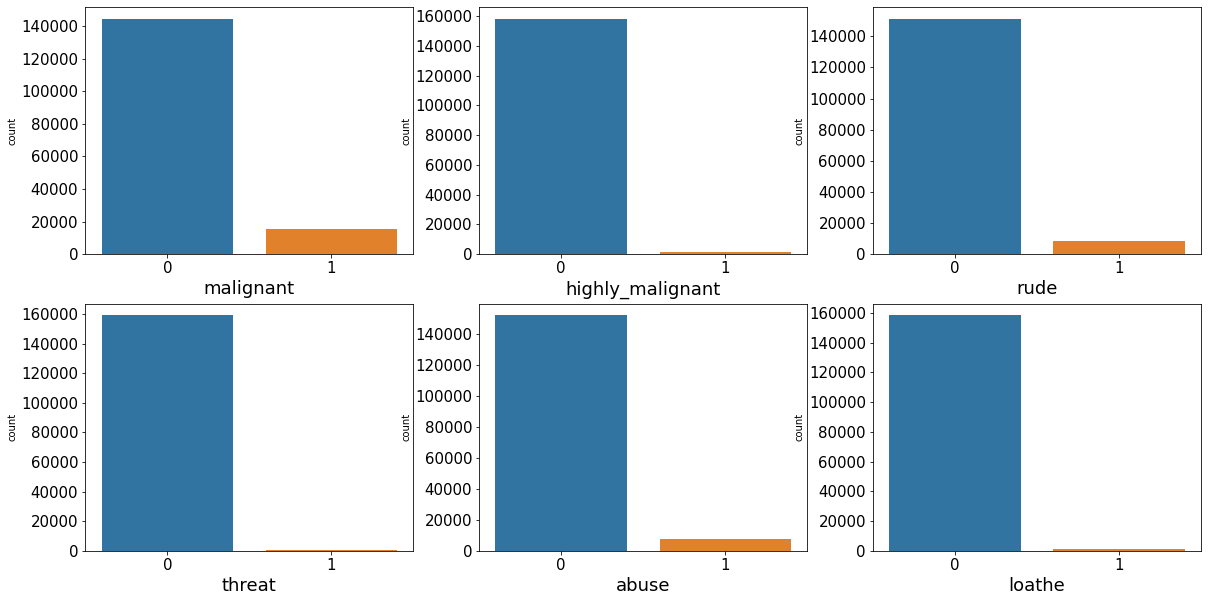

In [10]:
# Countplot for all the features
categories=train_data.columns[2:]
plt.figure(figsize=(20,10))
plotnumber=1
for col in categories:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.countplot(train_data[col])
        plt.xlabel(col,fontsize=18)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plotnumber += 1
plt.show()

***Although malignant remarks make up the majority of negative comments, many comments are also abusive and unpleasant, while threat comments make up the least amount of negative comments.***

average length of comment: 394.139


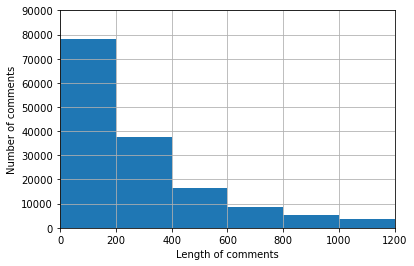

In [11]:
# Let us analyse the no. of comments having lengths varying from 0 to 1200
comment=train_data['comment_text']
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [12]:
#Checking the percentage of the comments
none = train_data[(train_data['malignant']!=1) & (train_data['highly_malignant']!=1) & (train_data['rude']!=1) & 
                            (train_data['threat']!=1) & (train_data['abuse']!=1) & (train_data['loathe']!=1)]
percent=len(none)/len(train_data)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


***90% of comments are positive or neutral, and the remaining 10% are negative.***

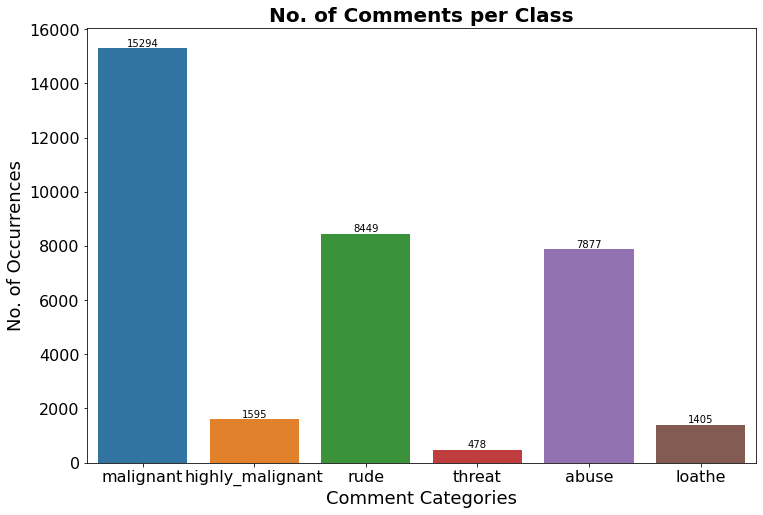

In [13]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = train_data.iloc[:,2:].sum()
# Plot a chart with the following size
plt.figure(figsize=(12,8))
# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of Comments per Class", fontsize=20, fontweight='bold')
plt.ylabel('No. of Occurrences', fontsize=18,)
plt.xlabel('Comment Categories', fontsize=18,)
plt.xticks(fontsize=16,)
plt.yticks(fontsize=16,)
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

***Out of all negative comments, malicious remarks make up the majority, followed by impolite categories.There aren't many remarks that are threatening***
 

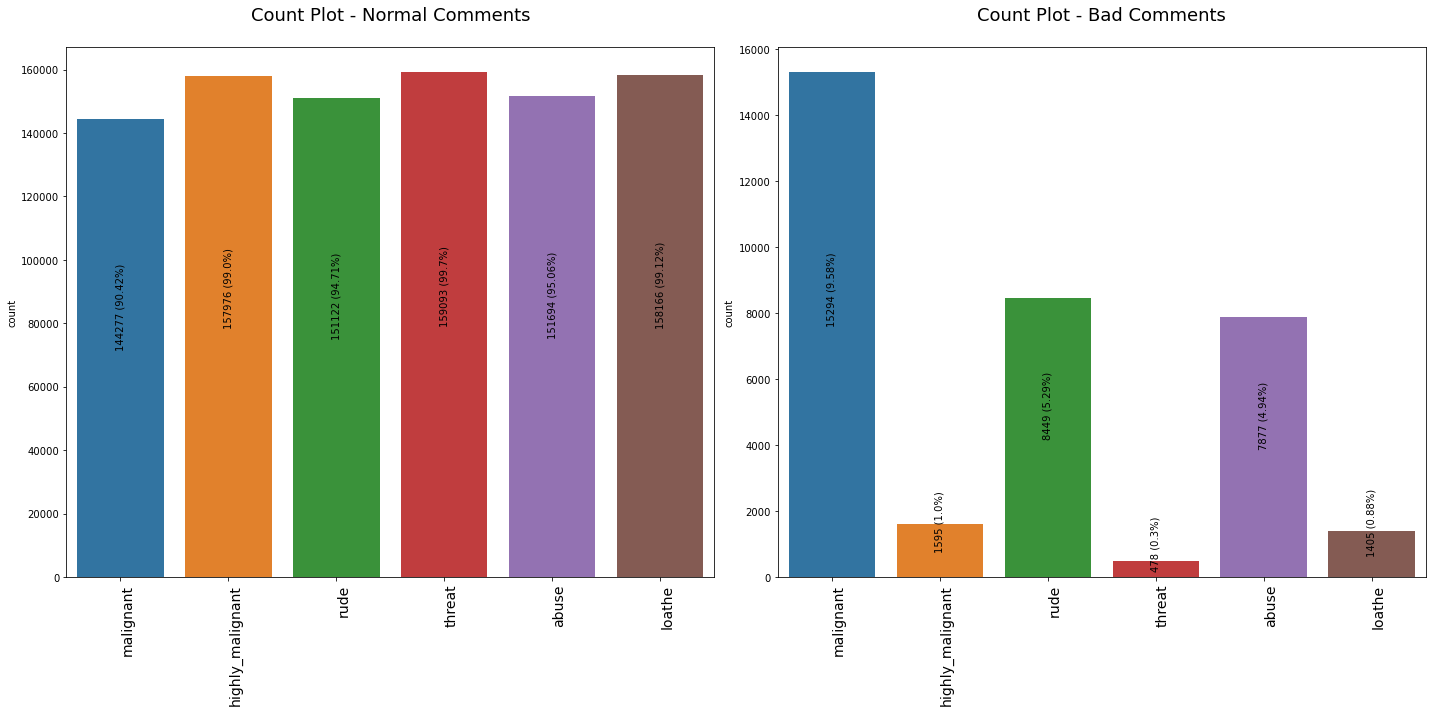

In [14]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(20,10))

for i in range(2):
    sns.countplot(data=train_data[train_data.columns[2:]][train_data[train_data.columns[2:]]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot - Normal Comments\n", fontsize=18,)
    else:
        ax[i].set_title("Count Plot - Bad Comments\n", fontsize=18,)
        
    ax[i].set_xticklabels(train_data.columns[2:], rotation=90, ha="left", fontsize=14,)
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(train_data),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center",)
        p += 1
plt.tight_layout()
plt.show()

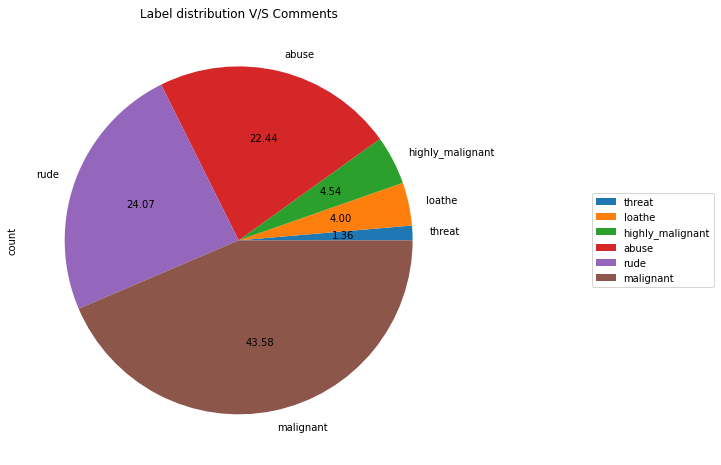

In [15]:
#Visualizing the label distribution of comments (pie chart)
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
train_data_distribution = train_data[train_data.columns[2:]].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

train_data_distribution.plot.pie(y = 'count', title = 'Label distribution V/S Comments',
                         autopct='%2.2f', figsize = (8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

# Observation: 

***90%  of the comments are positive or neutral, and the remaining ten percent are critical Out of all the bad comments, 24.07% are impolite and 43.58% are malicious in nature***

In [16]:
train_data.comment_text.str.len().median()

205.0

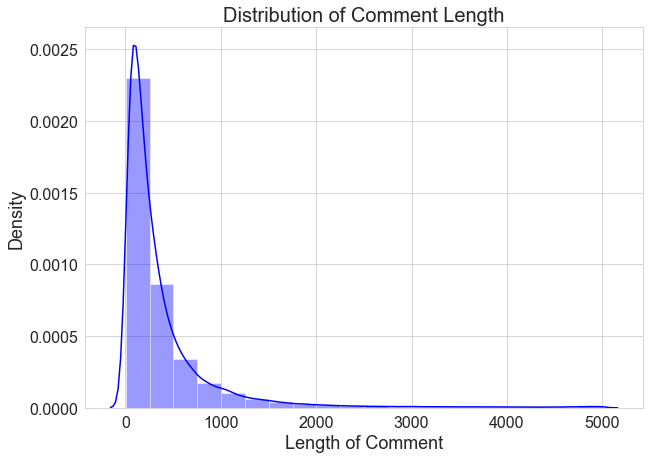

In [17]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_length = train_data.comment_text.str.len()
comment_length = train_data.comment_text.str.len()
sns.distplot(comment_length, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20,)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Length of Comment', fontsize=18)
plt.xticks(fontsize=16,)
plt.yticks(fontsize=16,)
plt.show()


***A plot displaying the frequency of comment length is shown above. As you may have seen, the majority of comments are brief, with only a few exceeding 1000 words. The majority of comments are 500 characters long, with a maximum of 5000 and a minimum of 5. The average length is 250.***

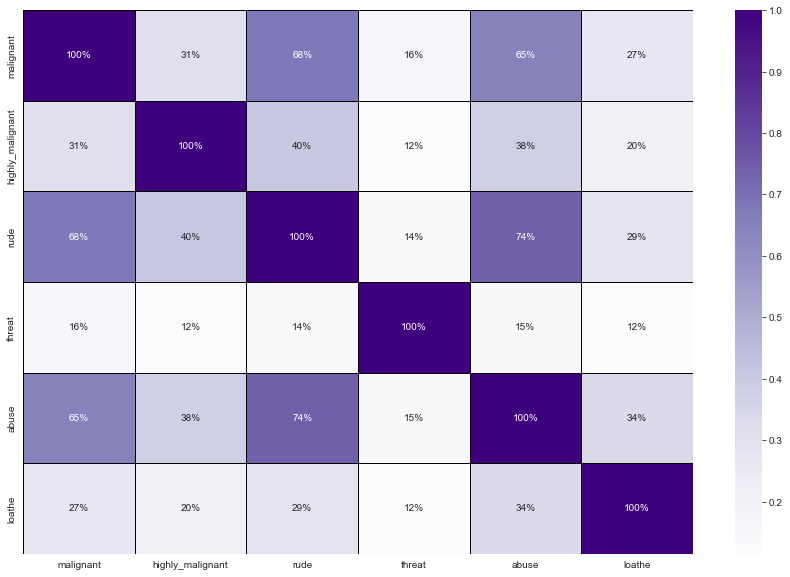

In [18]:
# Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15, 10))
corr = train_data.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='Purples', annot=True)
plt.show()


***The fields "rude" and "abuse" have the most positive association.***

***Every other feature in this training dataset that has an attribute called "threat" has a negative correlation with it.***

***Nearly all variables have negative correlations with one another.***

# Data Pre-Processing

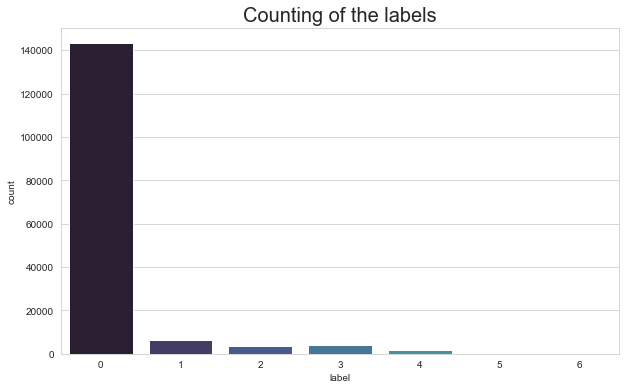

In [19]:
#As ID is not much important, we can drop from the dataset
train_data.drop('id',axis=1,inplace=True)
test_data.drop('id',axis=1,inplace=True)
#Checking the count of labels
train_data['label']=train_data[comments_labels].sum(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(train_data['label'], palette='mako')
plt.title('Counting of the labels',fontsize=20)
plt.show()


#Text Mining
Operation perform are as followed:

**Removing Punctuations and other special characters**

**Word Tokenzation**

**Removing Stop Words**

**Stemming and Lemmatising**

**Applying Count Vectoriser** 

In [20]:
# Importing required libraries for Text mining

!pip install wordcloud

In [21]:
! pip install sklearn

In [22]:
! pip install scikit-learn==0.13

  Using cached scikit-learn-0.13.tar.gz (3.5 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.0

  ERROR: Command errored out with exit status 1:
   command: 'D:\New folder\Android\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\prade\\AppData\\Local\\Temp\\pip-install-x0ahydvh\\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\\setup.py'"'"'; __file__='"'"'C:\\Users\\prade\\AppData\\Local\\Temp\\pip-install-x0ahydvh\\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\prade\AppData\Local\Temp\pip-wheel-vfy9uf4e'
       cwd: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\
  Complete output (985 lines):
  Partial import of sklearn during the build process.
  Copying source tree into build/py3k for 2to3 


    Uninstalling scikit-learn-1.1.0:
      Successfully uninstalled scikit-learn-1.1.0
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to d:\new folder\android\lib\site-packages\scikit_learn-1.1.0.dist-info\
   from D:\New folder\Android\Lib\site-packages\~cikit_learn-1.1.0.dist-info
  Moving to d:\new folder\android\lib\site-packages\sklearn\
   from D:\New folder\Android\Lib\site-packages\~~learn


  RefactoringTool: No changes to C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\decomposition\pca.py
  RefactoringTool: No changes to C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\decomposition\sparse_pca.py
  RefactoringTool: Refactored C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\decomposition\tests\test_dict_learning.py
  RefactoringTool: No changes to C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\decomposition\tests\test_factor_analysis.py
  RefactoringTool: No changes to C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\decomposition\tests\test_fastica.py
  RefactoringTool: No changes to C:\Users\prade\AppData\Local\Temp\

In [23]:
! pip install nltk

  RefactoringTool: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\covariance\shrunk_covariance_.py
  RefactoringTool: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\covariance\tests\test_covariance.py
  RefactoringTool: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\covariance\tests\test_graph_lasso.py
  RefactoringTool: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\covariance\tests\test_robust_covariance.py
  RefactoringTool: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\datasets\__init__.py
  RefactoringTool: C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\skle

  sklearn\svm\setup.py:55: UserWarning:
      Blas (http://www.netlib.org/blas/) libraries not found.
      Directories to search for the libraries can be specified in the
      numpy/distutils/site.cfg file (section [blas]) or by setting
      the BLAS environment variable.
    warnings.warn(BlasNotFoundError.__doc__)
  sklearn\setup.py:64: UserWarning:
      Blas (http://www.netlib.org/blas/) libraries not found.
      Directories to search for the libraries can be specified in the
      numpy/distutils/site.cfg file (section [blas]) or by setting
      the BLAS environment variable.
    warnings.warn(BlasNotFoundError.__doc__)
  running bdist_wheel
  running build
  running config_cc
  unifing config_cc, config, build_clib, build_ext, build commands --compiler options
  running config_fc
  unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
  running build_src
  build_src
  building library "libsvm-skl" sources
  building library "blas" sources
  bui

    Converting to Python3 via 2to3...
    RefactoringTool: Skipping optional fixer: buffer
    RefactoringTool: Skipping optional fixer: idioms
    RefactoringTool: Skipping optional fixer: set_literal
    RefactoringTool: Skipping optional fixer: ws_comma
    RefactoringTool: Refactored C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\__init__.py
    RefactoringTool: No changes to C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\_build_utils.py
    RefactoringTool: Refactored C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\base.py
    RefactoringTool: Refactored C:\Users\prade\AppData\Local\Temp\pip-install-x0ahydvh\scikit-learn_5a468daa4a2b40f096562d5d636e1e38\build\py3k\sklearn\cross_validation.py
    RefactoringTool: Refactored C:\Users\prade\AppData\Local\Temp\pip-instal

    building extension "sklearn.utils.seq_dataset" sources
    building extension "sklearn.utils.weight_vector" sources
    building extension "sklearn.utils.random" sources
    building data_files sources
    build_src: building npy-pkg config files
    running build_py
    creating build
    creating build\lib.win-amd64-3.9
    creating build\lib.win-amd64-3.9\sklearn
    copying sklearn\base.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\cross_validation.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\dummy.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\grid_search.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\hmm.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\isotonic.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\kernel_approximation.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\lda.py -> build\lib.win-amd64-3.9\sklearn
    copying sklearn\multiclass.py -> build\lib.win-amd64-3.9\sklearn
    copying skle

In [24]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prade\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prade\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
#Defining the stop words
stop_words = stopwords.words('english')

In [27]:
#Replacing '\n' in comment_text
train_data['comment_text'] = train_data['comment_text'].replace('\n',' ')

In [28]:

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [29]:
# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
train_data['comment_text'] = train_data['comment_text'].apply(clean_comments)
train_data['comment_text'].head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

**We can see that nearly half of the text has been removed from the comment_text after using required pre-processing**.

In [30]:
# Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
test_data['comment_text'] = test_data['comment_text'].apply(clean_comments)
test_data['comment_text'].head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

# Word Cloud for different Target Feature
**From the wordclouds above, it is clear that larger letters carry greater weight for each sort of comment, whilst smaller texts carry less weight.**

**Word Cloud for  MALIGNANT**


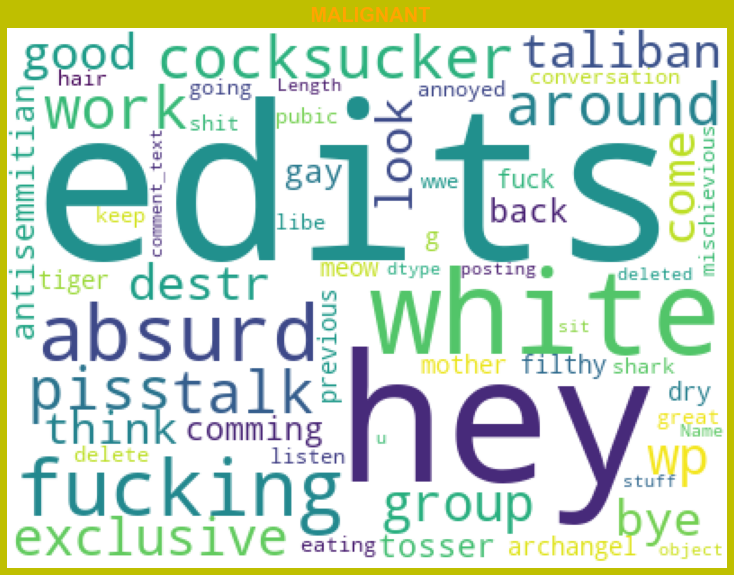

In [31]:
# Plotting for malignant
train_data_malignant=train_data[(train_data['malignant']==1)]
wordcloud=WordCloud(height=300,width=400,max_words=300,background_color="white").generate(str(train_data_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label=' MALIGNANT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'orange'})
plt.show()

### From wordcloud of malignant comments, it is clear that it mostly consists of words like edits, hey, white,absurd,fucking, gay, cocksucker, etc

**Word Cloud for  HIGHLY MALIGNANT**

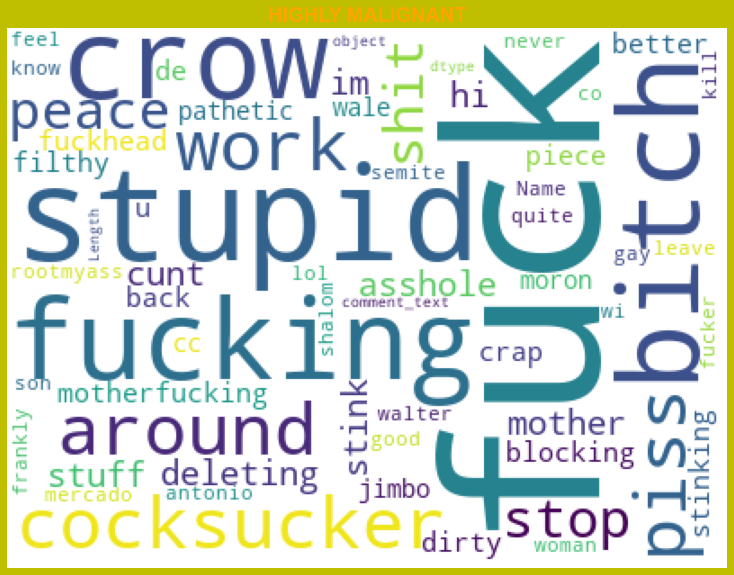

In [32]:
# Plotting for highly_malignant
train_data_highlymalignant=train_data[(train_data['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=400,max_words=300,background_color="white").generate(str(train_data_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='HIGHLY MALIGNANT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'orange'})
plt.show()


## From wordcloud of Highly malignant comments, it is clear that it mostly consists of words like fuck, stupid, fucking, bitch, crow, shit, cocksucker etc.

**Word Cloud for RUDE**

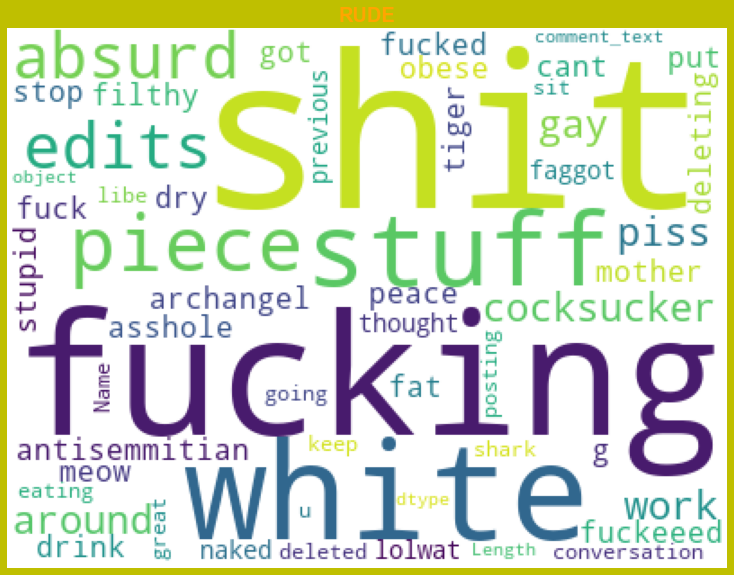

In [33]:
# Plotting for rude
train_data_rude=train_data[(train_data['rude']==1)]
wordcloud=WordCloud(height=300,width=400,max_words=300,background_color="white").generate(str(train_data_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='RUDE',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'orange'})
plt.show()

From wordcloud of Rude comments, it is clear that it mostly consists of words like fucking, shit, white, piece, edits, stuff, absurd etc.

**Word Cloud for THREAT**

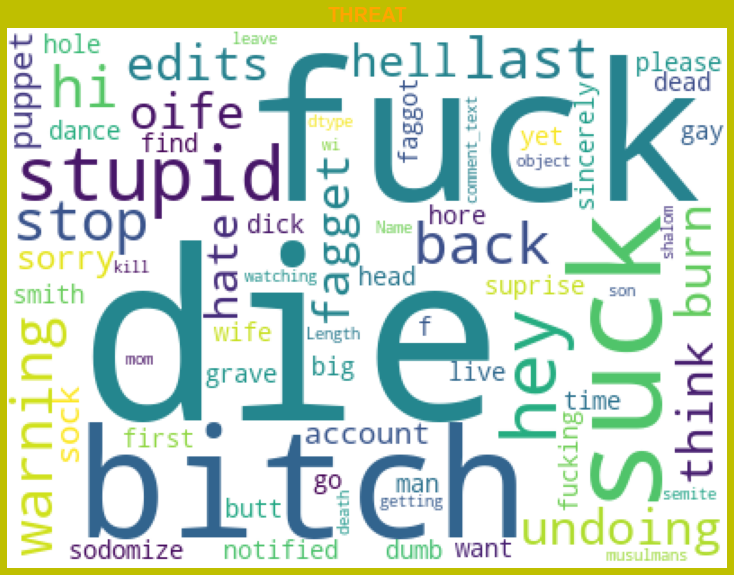

In [34]:
# Plotting for threat
train_data_threat=train_data[(train_data['threat']==1)]
wordcloud=WordCloud(height=300,width=400,max_words=300,background_color="white").generate(str(train_data_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='THREAT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'orange'})
plt.show()


## From wordcloud of Threat comments, it is clear that it mostly consists of words like fuck,suck, Bitch, die, stupid, etc.

**Word Cloud for ABUSE**

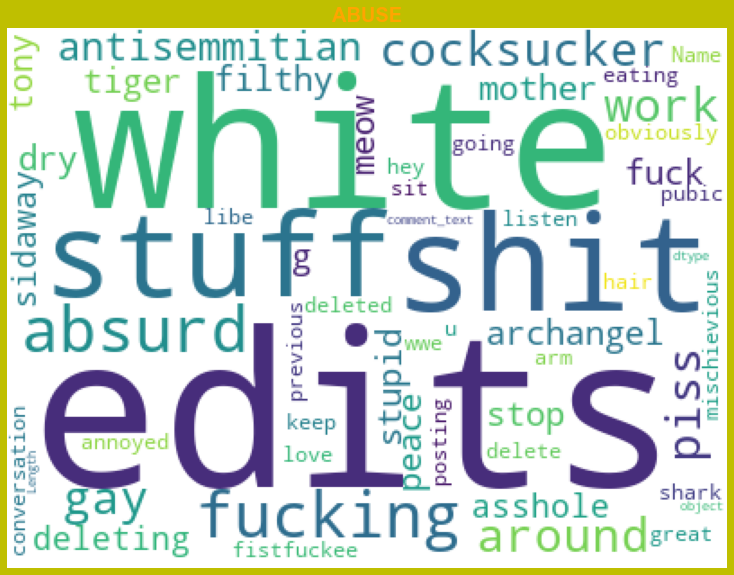

In [35]:
# Plotting for abuse
train_data_abuse=train_data[(train_data['abuse']==1)]
wordcloud=WordCloud(height=300,width=400,max_words=300,background_color="white").generate(str(train_data_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='ABUSE',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'orange'})
plt.show()

From wordcloud of Abuse comments, it is clear that it mostly consists of words like edits, white, shit, stuff, fuck, piss, fucking etc.

**Word Cloud for  LOATHE**

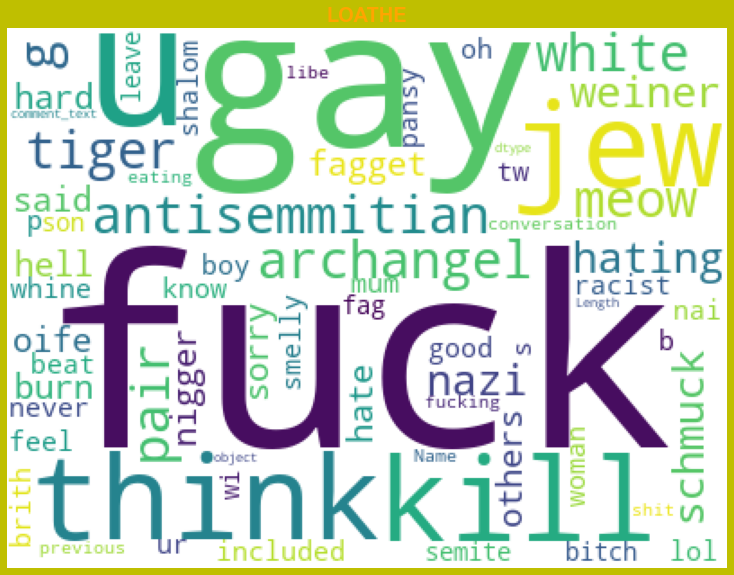

In [36]:
# Plotting for loathe
train_data_loathe=train_data[(train_data['loathe']==1)]
wordcloud=WordCloud(height=300,width=400,max_words=300,background_color="white").generate(str(train_data_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='LOATHE',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'orange'})
plt.show()

## From wordcloud of Loathe comments, it is clear that it mostly consists of words like fuck,gay, kill, think, jew, u etc.

In [37]:
# pd.DataFrame(train_data).to_excel('cleaned_data_train.xlsx')
# pd.DataFrame(test_data).to_excel('cleaned_data_test.xlsx')

In [41]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english', encoding='utf-8')
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(train_data['comment_text']).toarray()
output_labels= train_data.columns[1:7]

In [42]:
# output variables
from scipy.sparse import csr_matrix
Y = csr_matrix(train_data[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape: (159571, 2000)
Output Variable Shape: (159571, 6)


**2. Vectorizer & Spliting Train dataset**

In [43]:
# Doing the above process for test data 
test_vec = tf_vec.fit_transform(test_data['comment_text'])
test_vec

<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2138199 stored elements in Compressed Sparse Row format>

In [44]:
test_vec.shape

(153164, 2000)

**Machine Learning Model Building**

In [45]:
!pip install scikit-multilearn

In [46]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss
import timeit, sys
import tqdm.notebook as tqdm

#  3. Training and Testing Model on our train dataset

In [47]:
# Creating a function to train and test model
def build_models(models,x,y,test_size=0.20,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n*******\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n*******\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n**********\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [65]:
from sklearn.naive_bayes import MultinomialNB
# Preparing the list of models for classification purpose
models = {
          "Logistic Regression": {"name": LogisticRegression()},
        "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
        "Multinomial Naive Bayes ": {"name": MultinomialNB()} 
         }

# Taking one third of the total data for training and testing purpose
half = len(train_data)//4

In [66]:
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/3 [00:00<?, ?it/s]


*******
Current Model in Progress: Logistic Regression 
*******
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.021765467686009107
	Accuracy Score: 0.9118937210176714
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       790
           1       0.60      0.16      0.25        93
           2       0.94      0.58      0.72       456
           3       0.40      0.08      0.13        26
           4       0.81      0.48      0.60       404
           5       0.77      0.16      0.26        64

   micro avg       0.89      0.49      0.63      1833
   macro avg       0.74      0.33      0.44      1833
weighted avg       0.88      0.49      0.62      1833
 samples avg       0.05      0.04      0.04      1833
Completed in [26.014041900000166 sec.]
**********

*******
Current Model in Progress: Support Vector Classifier 
*******
Training:  BinaryRelevance(classifier=LinearS

In [ ]:
m = {"DecisionTreeClassifier": {"name": DecisionTreeClassifier()},
         }
build_models(m,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/1 [00:00<?, ?it/s]


*******
Current Model in Progress: DecisionTreeClassifier 
*******
Training:  BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense=[True, True])


In [52]:
from sklearn.model_selection import  GridSearchCV
param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111] }
           
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, param, cv=3,verbose = 10)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 1/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.3s
[CV 2/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 2/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.3s
[CV 3/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 3/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.2s
[CV 1/3; 2/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=7

[CV 3/3; 10/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=42;, score=0.912 total time=   7.4s
[CV 1/3; 11/24] START estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72
[CV 1/3; 11/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72;, score=0.914 total time=  10.1s
[CV 2/3; 11/24] START estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72
[CV 2/3; 11/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72;, score=0.915 total time=   9.9s
[CV 3/3; 11/24] START estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72
[CV 3/3; 11/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2

[CV 1/3; 20/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=72;, score=0.914 total time=   9.9s
[CV 2/3; 20/24] START estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=72
[CV 2/3; 20/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=72;, score=0.915 total time=   9.4s
[CV 3/3; 20/24] START estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=72
[CV 3/3; 20/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=72;, score=0.912 total time=   5.8s
[CV 1/3; 21/24] START estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=111
[CV 1/3; 21/24] END estimator__loss=squared_hinge, est

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

# Final Model

In [67]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', 
            multi_class='ovr', penalty='l2', random_state=42))

Classifier = Final_Model.fit(x_train, y_train)
final_pred = Final_Model.predict(x_test)
final_acc = (accuracy_score(y_test, final_pred))*100
print("Accuracy score for the Best Model is:", final_acc)
h_loss = hamming_loss(y_test,final_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.26002673796792
Hamming loss for the Best Model is: 2.0819407308377897


# Final Model is giving us Accuracy score of 91.26% which is slightly improved compare to earlier Accuracy score of 91.15%.

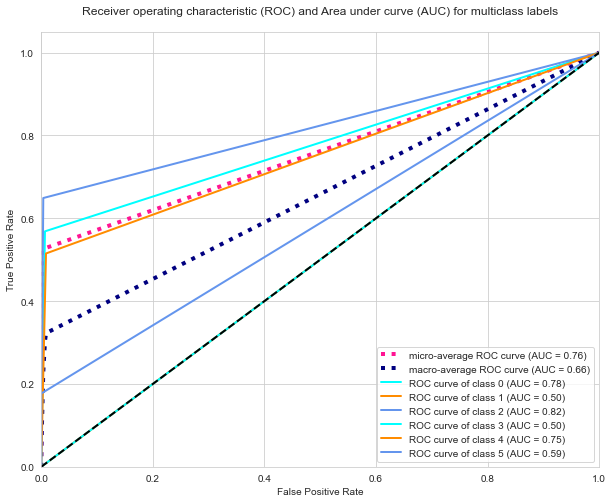

In [68]:
from itertools import cycle
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], final_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), final_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n")
plt.legend(loc="lower right")
plt.show()
 

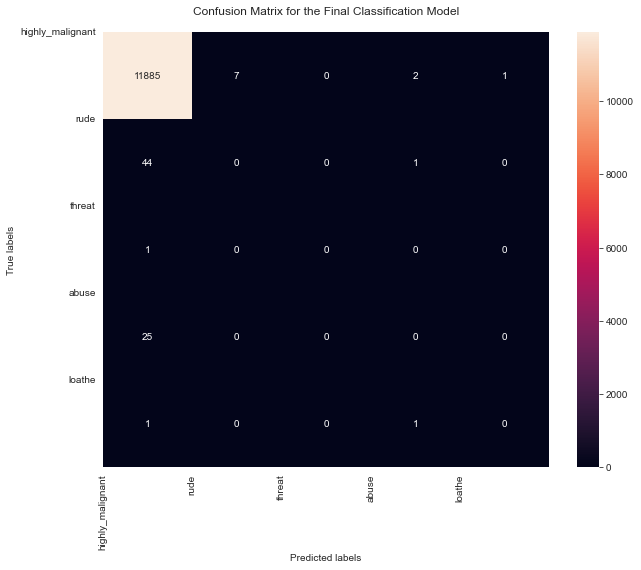

In [69]:
import matplotlib
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(final_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = matplotlib.ticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

In [71]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
import joblib
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

In [72]:
# saving the best classification model
import joblib
best_model = joblib.load('Malignant_comments_classifier.pkl')
#joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

In [73]:
test_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
# Make predictions and view the results
predict_test = best_model.predict(test_vec.toarray())

# Saving predicted values into a CSV file
pd.DataFrame(predict_test).to_csv('Predicted_test_output.csv')
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=test_data.copy()
df = pd.concat([df2, df1], axis=1)
df
df.to_csv('result.csv', index=False)

In [ ]:
## Project completed